In [1]:
import numpy as np

def diversity_gradient(dfdw_train, dfdw_val, mylambda, sigma_p):
    """
    This is the gradient of the diversity term.

    Parameters
    ----------
    dfdw_train: float
        the gradient of the output of a neural network, with respect to a single weight, given a training sample.
    dfdw_val: float
        the gradient of the output of a neural network, with respect to a single weight, given a validation sample.
    mylambda: float
        the temperature parameter when estimating a posterior
    sigma_p: float
        the prior variance

    Returns
    -------
    grad: float
        the diversity gradient.
    """
    term1 = -(mylambda*dfdw_train**2+1/sigma_p)**(-2)*(2*mylambda*dfdw_train**3)*dfdw_val**2
    term2 = (mylambda*dfdw_train**2+1/sigma_p)**(-1)*2*dfdw_val**3
    grad = term1+term2
    return grad

Create Figure.

Text(0.5, 1.0, '$\\left(\\left[\\frac{\\partial p(\\boldsymbol{y}_t;x_tw)}{\\partial w}\\right]_{-}\\right)^2 > 0$')

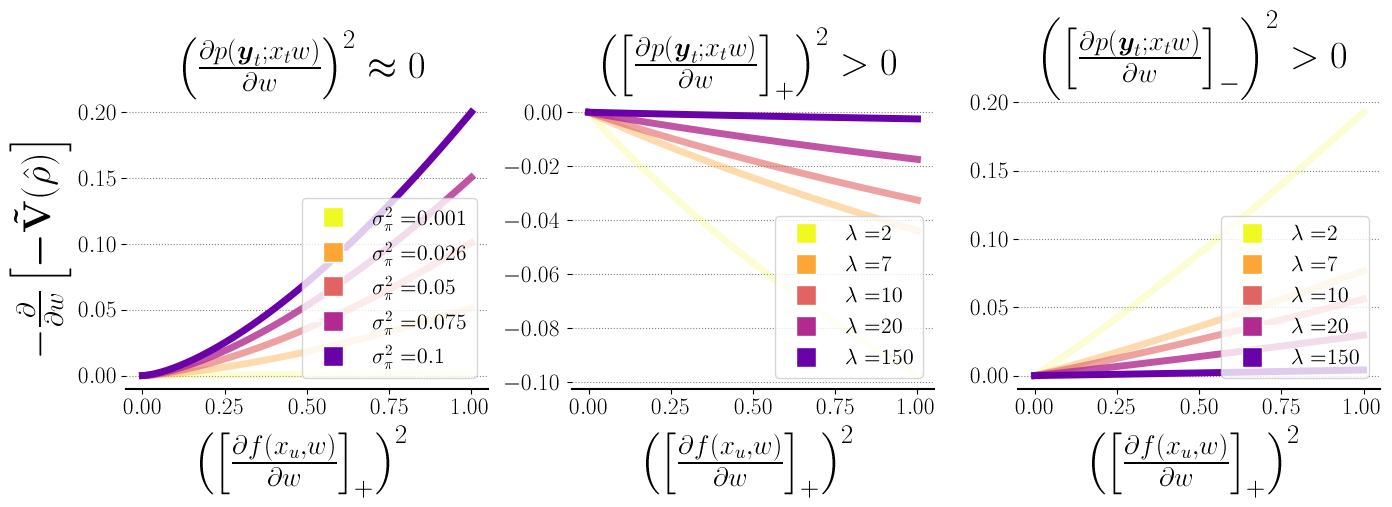

In [8]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

f, axs = plt.subplots(1, 3,figsize = (14, 5))

dfdw_val = np.linspace(0,1,1000)
dfdw_train = 0
sigmas_p = np.linspace(0.001,0.1,5)
colors = np.linspace(1,0.2,5)


size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []
for sigma_p, color in zip(sigmas_p,colors):
    z = diversity_gradient(dfdw_train = dfdw_train, dfdw_val= dfdw_val, mylambda=10000, sigma_p=sigma_p)
    axs[0].plot(dfdw_val**2, z, linewidth=5, c=cmap(color), linestyle='-',alpha=1-color+0.2)
    patches.append(Line2D([0], [0], marker='s', color='w', label='$\sigma^2_{\pi}=$'+str(round(sigma_p,3)),
                      markerfacecolor=cmap(color), markersize=15))


# Figure formating
axs[0].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[0].spines.values()]
plt.tight_layout()
#plt.ylim(-10, 5)

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

axs[0].legend(loc=4, handles=patches, fontsize=size_font_legend)
axs[0].set_xlabel(r'$\left(\left[\frac{\partial f(x_u,w)}{\partial w}\right]_+\right)^2$', fontsize=size_font_title)
axs[0].set_ylabel(r'$-\frac{\partial}{\partial w} \left[ \boldsymbol{-\tilde{\mathrm{V}}}(\hat{\rho}) \right]$', fontsize=size_font_title)
axs[0].set_title(r'$\left(\frac{\partial p(\boldsymbol{y}_t;x_tw)}{\partial w}\right)^2\approx 0$', fontsize=size_font_title)


dfdw_val = np.linspace(0,1,1000)
dfdw_train1 = 4
mylambdas = [2,7,10,20,150]
colors = np.linspace(1,0.2,5)

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []
for mylambda, color in zip(mylambdas,colors):
    z1 = diversity_gradient(dfdw_train = dfdw_train1, dfdw_val= dfdw_val, mylambda=mylambda, sigma_p=0.1)
    axs[1].plot(dfdw_val**2, z1, linewidth=5, c=cmap(color), linestyle='-',alpha=1-color+0.2)
    patches.append(Line2D([0], [0], marker='s', color='w', label='$\lambda=$'+str(round(mylambda,3)),
                      markerfacecolor=cmap(color), markersize=15))


# Figure formating
axs[1].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[1].spines.values()]
plt.tight_layout()
#plt.ylim(-10, 5)

axs[1].tick_params(axis='both', which='major', labelsize=tick_size)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

axs[1].legend(loc=4, handles=patches, fontsize=size_font_legend)
axs[1].set_xlabel(r'$\left(\left[\frac{\partial f(x_u,w)}{\partial w}\right]_{+}\right)^2$', fontsize=size_font_title)
#axs[1].set_ylabel(r'$-\frac{\partial}{\partial w} \left[ \boldsymbol{-\tilde{\mathrm{V}}}(\hat{\rho}) \right]$', fontsize=size_font_title)
axs[1].set_title(r'$\left(\left[\frac{\partial p(\boldsymbol{y}_t;x_tw)}{\partial w}\right]_+\right)^2 > 0$', fontsize=size_font_title)

dfdw_val = np.linspace(0,1,1000)
dfdw_train1 = -4
mylambdas = [2,7,10,20,150]
colors = np.linspace(1,0.2,5)

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

size_font_title = 28
size_font_legend = 16
size_font_axis = 20
tick_size = 17  # 17
border_linewidth = 1.5

cmap = plt.colormaps["plasma"]
patches = []
for mylambda, color in zip(mylambdas,colors):
    z1 = diversity_gradient(dfdw_train = dfdw_train1, dfdw_val= dfdw_val, mylambda=mylambda, sigma_p=0.1)
    axs[2].plot(dfdw_val**2, z1, linewidth=5, c=cmap(color), linestyle='-',alpha=1-color+0.2)
    patches.append(Line2D([0], [0], marker='s', color='w', label='$\lambda=$'+str(round(mylambda,3)),
                      markerfacecolor=cmap(color), markersize=15))


# Figure formating
axs[2].grid(linestyle=':', color='grey', axis='y')
[i.set_linewidth(border_linewidth) for i in axs[2].spines.values()]
plt.tight_layout()
#plt.ylim(-10, 5)

axs[2].tick_params(axis='both', which='major', labelsize=tick_size)

axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)

cmap = plt.colormaps["plasma"]

axs[2].legend(loc=4, handles=patches, fontsize=size_font_legend)
axs[2].set_xlabel(r'$\left(\left[\frac{\partial f(x_u,w)}{\partial w}\right]_{+}\right)^2$', fontsize=size_font_title)
#axs[2].set_ylabel(r'$-\frac{\partial}{\partial w} \left[ \boldsymbol{-\tilde{\mathrm{V}}}(\hat{\rho}) \right]$', fontsize=size_font_title)
axs[2].set_title(r'$\left(\left[\frac{\partial p(\boldsymbol{y}_t;x_tw)}{\partial w}\right]_{-}\right)^2 > 0$', fontsize=size_font_title)